In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('HollywoodsMostProfitableStories.csv',encoding='ISO-8859-1') #added encoding argument to avoid errors

df.info() #tells us size of dataframe, data type of columns, columns with null values
df.isnull().sum() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               79 non-null     object 
 1   Genre              78 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               78 non-null     float64
dtypes: float64(5), object(3)
memory usage: 5.1+ KB


Film                 0
Genre                1
Lead Studio          6
Audience  score %    6
Profitability        8
Rotten Tomatoes %    6
Worldwide Gross      5
Year                 1
dtype: int64

In [ ]:
df.sample(15)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
19,Just Wright,Comedy,Fox,58.0,1.797417,45.0,21.569000,2010.0
45,Rachel Getting Married,Drama,Independent,61.0,1.384167,85.0,16.610000,2008.0
75,Avatar,Fantasy,NaN,NaN,NaN,NaN,NaN,2009.0
28,Made of Honor,Comedy,Sony,61.0,2.649068,13.0,105.962734,2008.0
62,Twilight: Breaking Dawn,Romance,Independent,68.0,6.383364,26.0,702.170000,2011.0
60,The Ugly Truth,Comedy,Independent,68.0,5.402632,14.0,205.300000,2009.0
57,The Proposal,Comedy,Disney,74.0,7.867500,43.0,314.700000,2009.0
20,Killers,Action,Lionsgate,45.0,1.245333,11.0,93.400000,2010.0
67,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432,2008.0
15,High School Musical 3: Senior Year,Comedy,Disney,76.0,22.913136,65.0,252.044501,2008.0


In [ ]:
df.describe() #we can check if the reviews are greater than 0 and less than or equal to 100, because cannot have negative score or score above maximum (100%)

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,78.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.115385
std,13.647665,8.292017,26.242655,157.067561,1.357813
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [ ]:
df.columns #check for hidden spaces in column names

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [ ]:
df.Genre.unique() #checking for misspelt genre names

array(['Comedy', 'Drama', 'Romance', 'Animation', 'Action', 'Fantasy',
       nan], dtype=object)

In [ ]:
df['Lead Studio'].unique() #checking for misspelt lead studio names

array(['Fox', 'Independent', 'Universal', 'Sony', 'Disney',
       'Warner Bros.', 'Lionsgate', 'Summit', '20th Century Fox',
       'The Weinstein Company', nan, 'New Line', 'Paramount', 'CBS'],
      dtype=object)

In [ ]:
len(df[df.isna().any(axis=1)]) #there are 10 rows with missing values, so after removing missing values, there should only be 69 rows left

10

In [ ]:
df = df.dropna(axis=0, how='any') #remove all rows with any missing values
df.isnull().sum() #verify there are no more missing values

Film                 0
Genre                0
Lead Studio          0
Audience  score %    0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

In [ ]:
len(df) #the new dataframe has 69 values now

69

In [ ]:
df = df.astype({"Audience  score %": int, "Rotten Tomatoes %": int, "Year": int}) #more accurate to have these columns as integer datatype because they do not contain any decimal numbers
#its better to do this step after removing missing values
#power bi doesn't accept year by itself as a date so i will just change it to int instead of a date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               69 non-null     object 
 1   Genre              69 non-null     object 
 2   Lead Studio        69 non-null     object 
 3   Audience  score %  69 non-null     int64  
 4   Profitability      69 non-null     float64
 5   Rotten Tomatoes %  69 non-null     int64  
 6   Worldwide Gross    69 non-null     float64
 7   Year               69 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ KB


<Axes: >

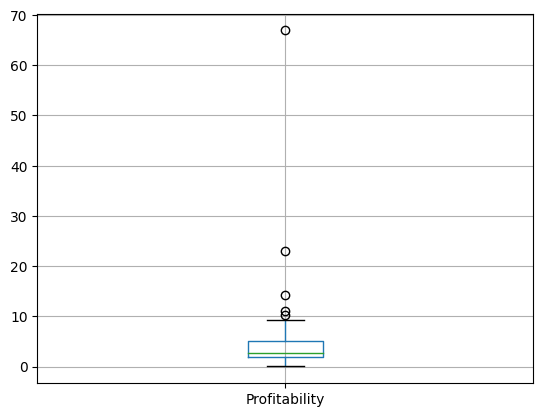

In [ ]:
df.boxplot('Profitability') #checking for outliers

In [ ]:
# Identify and remove the row with the outlier
outlier_index= df[df['Profitability']>60].index
df = df.drop(outlier_index)
#run above line of code to check the outlier is removed

<Axes: >

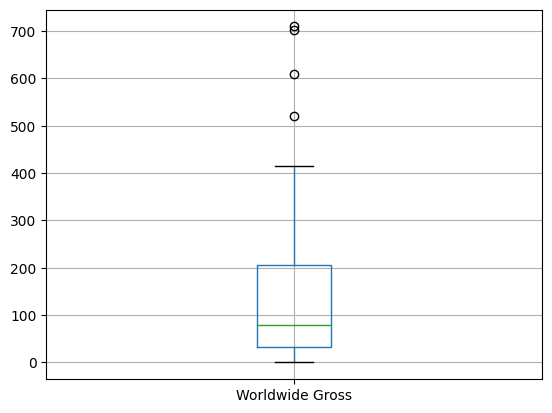

In [ ]:
df.boxplot('Worldwide Gross') #checking for outliers

In [ ]:
from google.colab import files
df.to_csv('cleaned_hollywood_data.csv')
files.download('cleaned_hollywood_data.csv')

#this code allows me to save the cleaned data as a csv and then download it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>